In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import pandas as pd
import numpy as np

In [2]:
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

In [3]:
cra_color = 'darkorange'
nsc_color = 'dodgerblue'
eco_color = 'dimgrey'

In [17]:
def insert_linebreak(string, lengLabel=49):
    return '\n'.join(string[i:i+lengLabel] for i in range(0, len(string), lengLabel))

In [18]:
def plot_sensitivity_analysis(df, curve_label, x_axis_label, y_axis_label, x_col, y_col, base_case_val):
    fig, ax = plt.subplots(figsize=(8,6))
    ax.get_yaxis().set_major_formatter(
        tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.set(xlabel=insert_linebreak(x_axis_label), ylabel=y_axis_label)
    plt.plot(df[x_col], df[y_col], color='teal',label=curve_label)
    plt.axhline(y=100000, color='sienna', linestyle='dotted', label='WTP=$100,000')
    plt.axvline(x=base_case_val, color='black', linestyle='dotted', label='Base Case Value')
    plt.ylim(0,max(df[y_col]))
    #plt.legend()
    plt.show()

In [19]:
osa_labels = pd.read_csv("OSA/osa.csv")
osa_labels.head()

,Filename,Variable,Label,Base Case
0,OSA/1OtoOW.csv,pOtotoxicity,Probability of ototoxicity after aminoglycosid...,0.01348
1,OSA/1RedOW.csv,pRed,"Probability of an infant classified as ""Red"" r...",0.03864


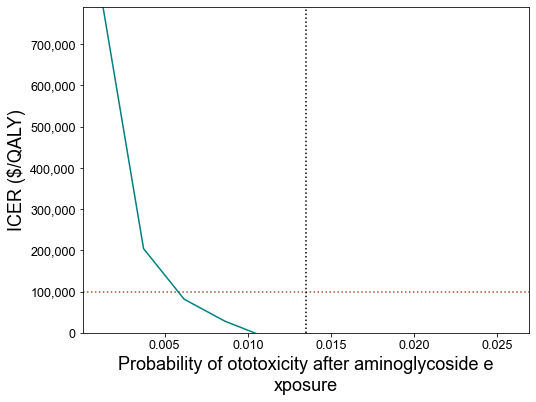

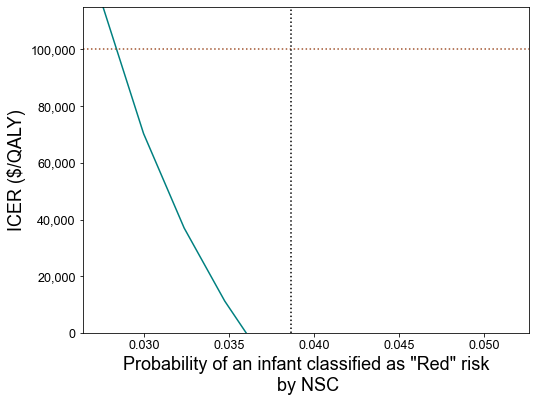

In [20]:
curve_label = "ICER"
y_axis_label = "ICER ($/QALY)"
y_col = "Enhanced Clinical Observation.3"


for _, row in osa_labels.iterrows():
    df = pd.read_csv(row["Filename"])
    df[y_col] = df[y_col].replace(to_replace='Cost Saving', value='-10000')
    df[y_col] = pd.to_numeric(df[y_col])
    #df = df.where(df[y_col] != 'Cost Saving').dropna(subset=[y_col])
    #print(df)
    #title = "ICER of ECO compared to NSC vs. Probability of Becoming Ill Appearing during ECO"
    x_axis_label = row["Label"]
    x_col = row["Variable"]
    base_case = row["Base Case"]
    plot_sensitivity_analysis(df, curve_label, x_axis_label, y_axis_label, x_col, y_col, base_case)